In [56]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_10.csv')
df = df[df['round'] == 'First Round']
print(df.shape)
df.head()

(286, 87)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,prpg!,...,D_B,D_C,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F
0,2015,Midwest,First Round,1,2015 Kentucky,16,2015 Hampton,1,25.3037,5.0000,...,0,0,0,0,0,0,0,0,0,0
6,2015,Midwest,First Round,8,2015 Cincinnati,9,2015 Purdue,1,-2.0646,-4.7000,...,0,0,0,0,0,0,0,0,0,0
7,2015,Midwest,First Round,5,2015 West Virginia,12,2015 Buffalo,1,4.9137,-5.8000,...,0,0,0,0,0,0,0,0,0,0
9,2015,Midwest,First Round,4,2015 Maryland,13,2015 Valparaiso,1,6.4317,-2.2000,...,0,0,0,0,0,0,0,0,0,0
10,2015,Midwest,First Round,6,2015 Butler,11,2015 Texas,1,2.5861,-2.3000,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df['win'].value_counts(normalize=True)

1   0.7063
0   0.2937
Name: win, dtype: float64

In [58]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'prpg!', 'dprpg',
       'bpm', 'obpm', 'dbpm', 'bpr', 'obpr', 'dbpr', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'high_tier', 'low_tier', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D',
       'S_F', 'A_S', 'A_A', 'A_B', 'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B',
       'B_C', 'B_D', 'B_F', 'C_S', 'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S',
       'D_A', 'D_B', 'D_C', 'D_D', 'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D',
       'F_F'],
      dtype='object')

In [59]:
eda_df = df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [60]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(200, 78)
(86, 78)


In [61]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [62]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      168
                         1       27
                    1    0        5
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      145
                         1       27
                    1    0       22
               1    0    0        5
          1    0    0    0        1
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      156
                    1    0       16
               1    0    0       15
               0    0    1        7
          1    0    0    0        5
     1    0    0    0    0        1
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      132
               1    0    0       48
               0    1    0       12
          1    0    0    0        6
          0    0    0    1        2
dtype: int64
D_S  D_A  D_B  D_C  D_D  D_F
0    0    0    0    0    0      199
               1    0    0        1
dtype: int64
F_S  F_A  F_B  F_C  F_D  F_F
0    

In [63]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
'win',
'S_D',
'S_F',
'A_C',
'A_D',
'A_F',
'B_B',
'B_C',
'B_D',
'B_F',
'C_B',
'C_C',
'C_D']]

In [64]:
all_tiers.groupby(by=['win', 'S_D']).size()

win  S_D
0    0       59
     1        1
1    0      136
     1        4
dtype: int64

In [65]:
all_tiers.groupby(by=['win', 'S_F']).size()

win  S_F
0    0       60
1    0      113
     1       27
dtype: int64

In [66]:
all_tiers.groupby(by=['win', 'A_C']).size()

win  A_C
0    0       59
     1        1
1    0      136
     1        4
dtype: int64

In [67]:
all_tiers.groupby(by=['win', 'A_D']).size()

win  A_D
0    0       57
     1        3
1    0      121
     1       19
dtype: int64

In [68]:
all_tiers.groupby(by=['win', 'A_F']).size()

win  A_F
0    0       56
     1        4
1    0      117
     1       23
dtype: int64

In [69]:
all_tiers.groupby(by=['win', 'B_B']).size()

win  B_B
0    0       57
     1        3
1    0      138
     1        2
dtype: int64

In [70]:
all_tiers.groupby(by=['win', 'B_C']).size()

win  B_C
0    0       55
     1        5
1    0      130
     1       10
dtype: int64

In [71]:
all_tiers.groupby(by=['win', 'B_D']).size()

win  B_D
0    0       54
     1        6
1    0      130
     1       10
dtype: int64

In [72]:
all_tiers.groupby(by=['win', 'B_F']).size()

win  B_F
0    0       60
1    0      133
     1        7
dtype: int64

In [73]:
all_tiers.groupby(by=['win', 'C_B']).size()

win  C_B
0    0       57
     1        3
1    0      137
     1        3
dtype: int64

In [74]:
all_tiers.groupby(by=['win', 'C_C']).size()

win  C_C
0    0       33
     1       27
1    0      119
     1       21
dtype: int64

In [75]:
all_tiers.groupby(by=['win', 'C_D']).size()

win  C_D
0    0       54
     1        6
1    0      134
     1        6
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_93506/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


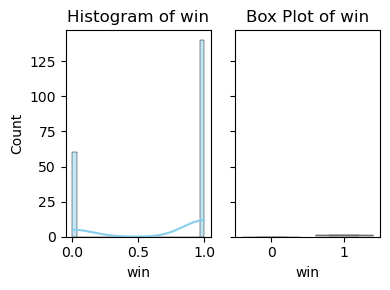

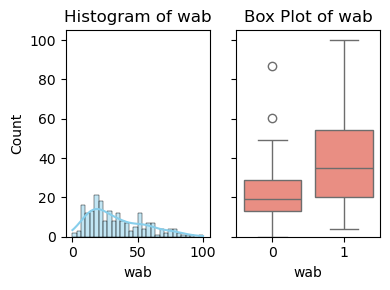

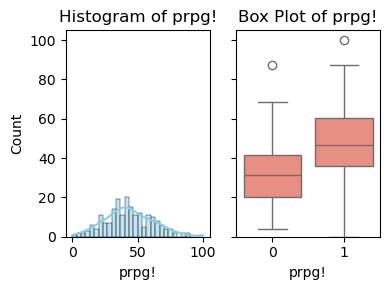

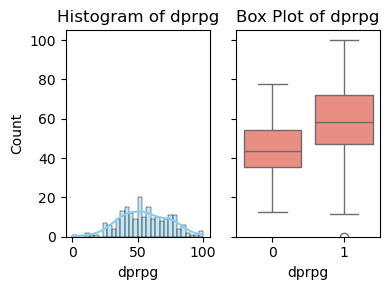

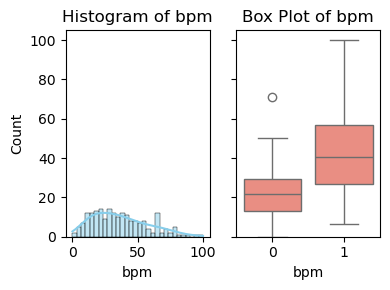

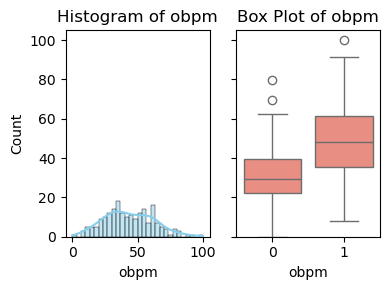

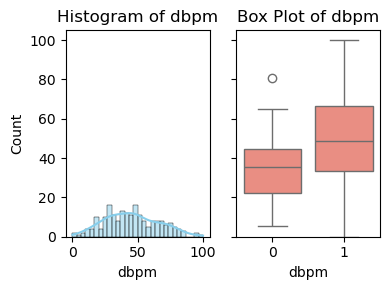

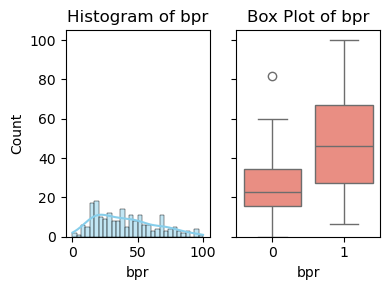

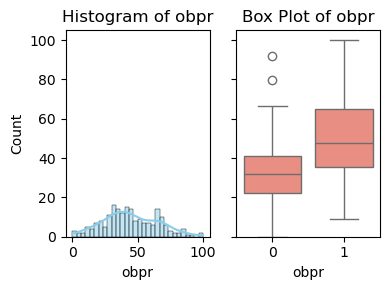

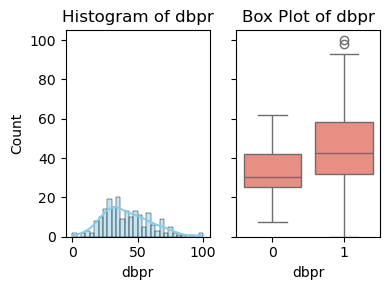

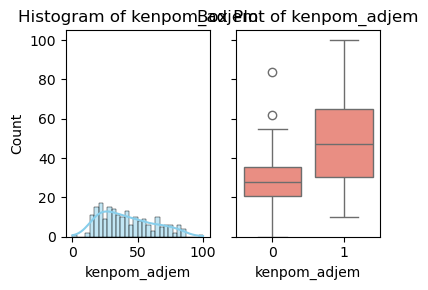

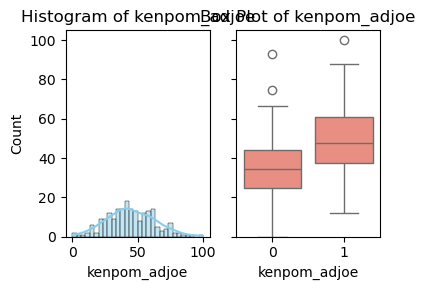

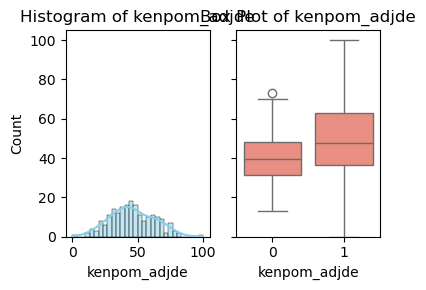

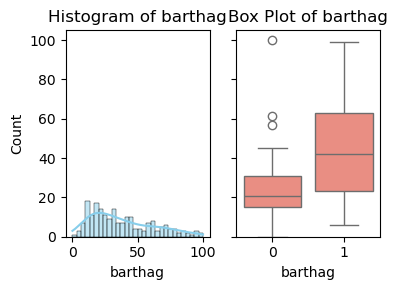

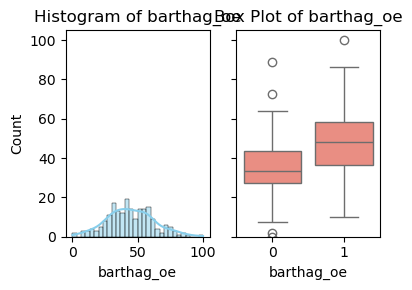

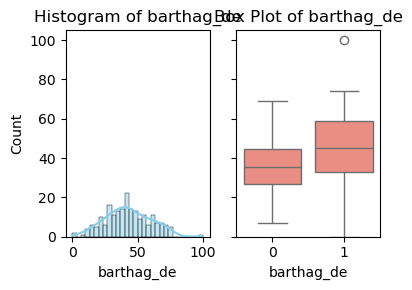

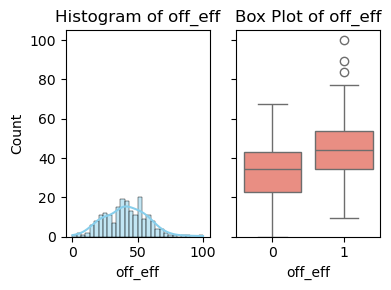

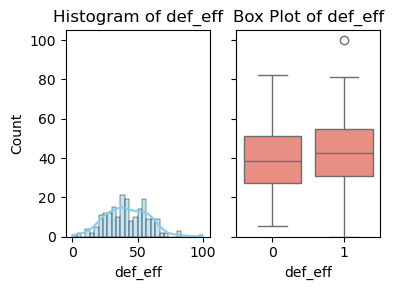

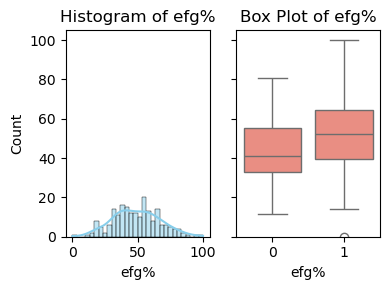

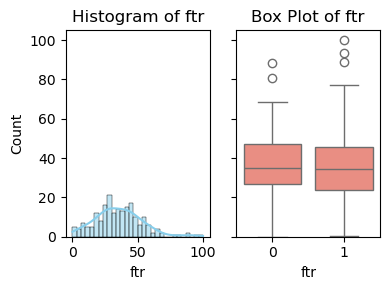

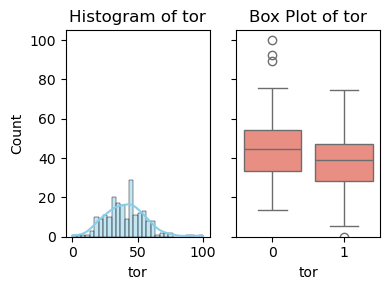

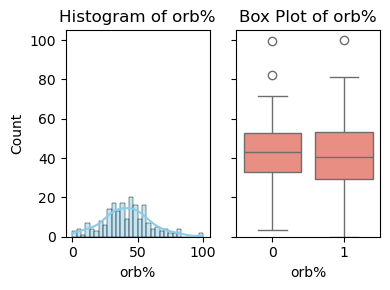

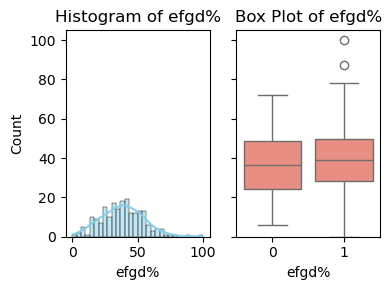

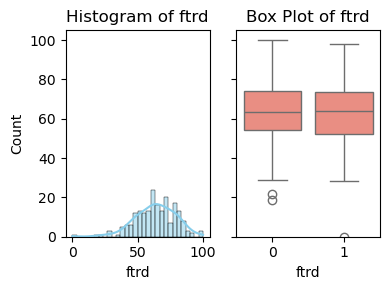

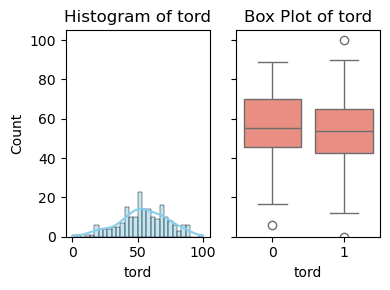

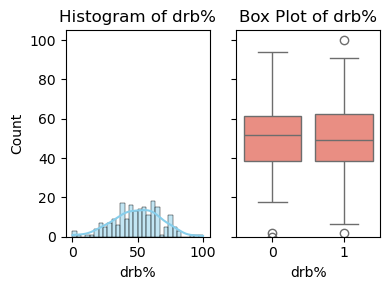

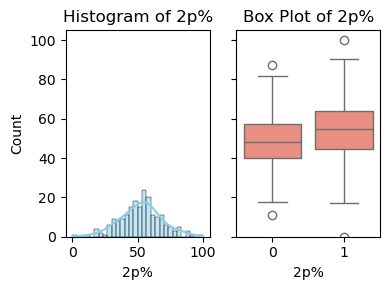

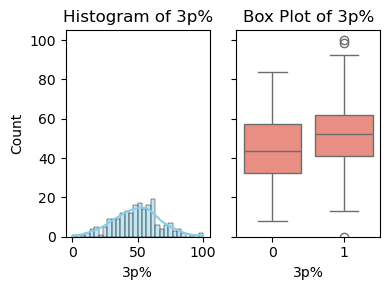

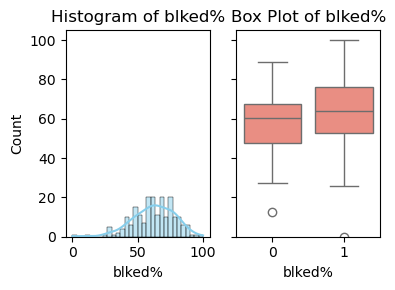

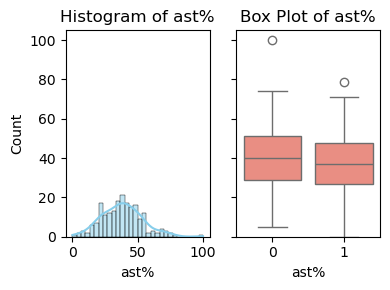

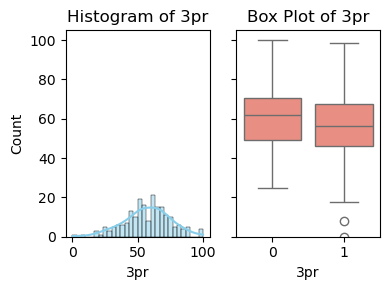

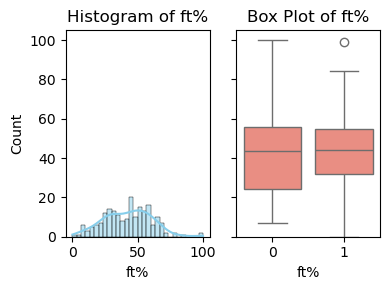

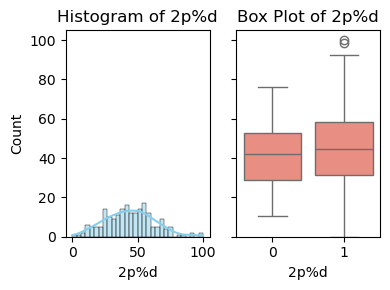

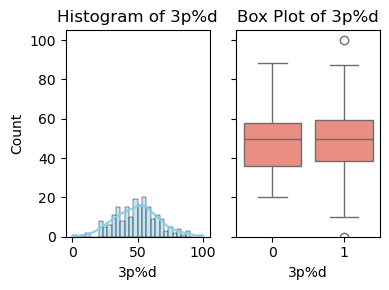

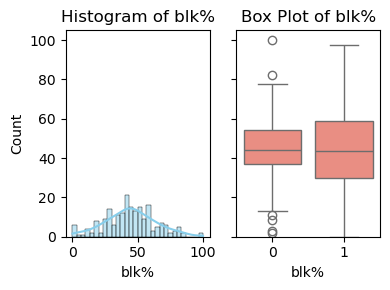

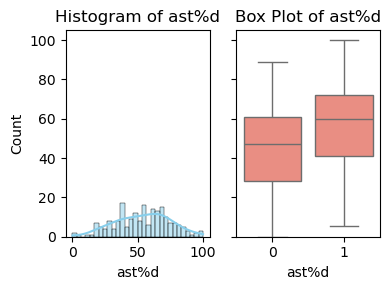

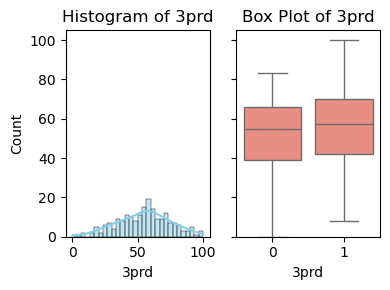

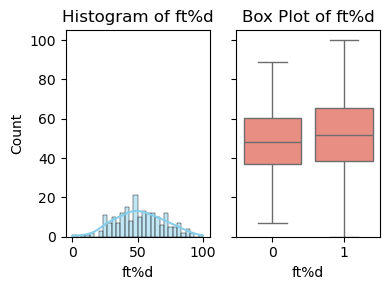

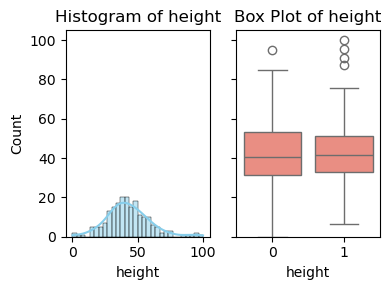

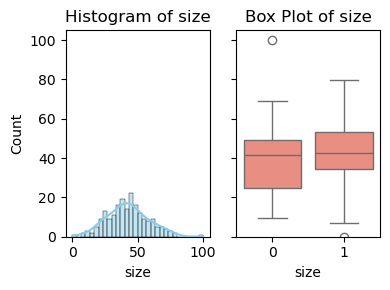

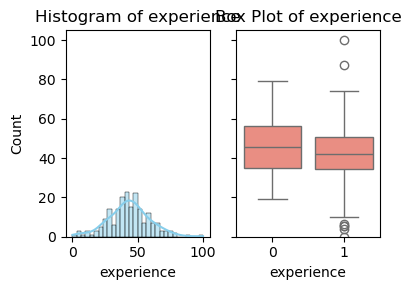

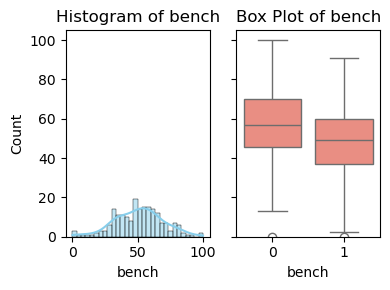

In [76]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [77]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             36.2700
prpg!           41.0800
dprpg           34.4300
bpm             42.3400
obpm            41.5200
dbpm            34.4000
bpr             41.0900
obpr            36.7500
dbpr            30.0100
kenpom_adjem    39.6700
kenpom_adjoe    34.8900
kenpom_adjde    24.2400
barthag         38.4500
barthag_oe      33.9000
barthag_de      25.7100
off_eff         26.6100
efg%            22.5200
tor             20.4000
2p%             14.0700
3p%             22.3500
blked%          17.6000
ast%            11.4700
ast%d           26.6900
3prd            10.6500
size            10.6600
experience      11.5000
bench           20.6500
Name: win, dtype: float64


In [78]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,29.9907,0.0000,0.1210
1,prpg!,40.1956,0.0000,0.1048
2,dprpg,26.6332,0.0000,0.1157
3,bpm,43.2420,0.0000,0.0959
4,obpm,41.2408,0.0000,0.0714
5,dbpm,26.5676,0.0000,0.0876
6,bpr,40.2189,0.0000,0.0650
7,obpr,30.9076,0.0000,0.0716
8,dbpr,19.6019,0.0000,0.0811
9,kenpom_adjem,36.9866,0.0000,0.1103


In [79]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
0,wab,29.9907,0.0000,0.1210
1,prpg!,40.1956,0.0000,0.1048
2,dprpg,26.6332,0.0000,0.1157
3,bpm,43.2420,0.0000,0.0959
4,obpm,41.2408,0.0000,0.0714
5,dbpm,26.5676,0.0000,0.0876
6,bpr,40.2189,0.0000,0.0650
7,obpr,30.9076,0.0000,0.0716
8,dbpr,19.6019,0.0000,0.0811
9,kenpom_adjem,36.9866,0.0000,0.1103


In [80]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,29.9907,0.0000,0.1210
1,prpg!,40.1956,0.0000,0.1048
2,dprpg,26.6332,0.0000,0.1157
3,bpm,43.2420,0.0000,0.0959
4,obpm,41.2408,0.0000,0.0714
5,dbpm,26.5676,0.0000,0.0876
6,bpr,40.2189,0.0000,0.0650
7,obpr,30.9076,0.0000,0.0716
8,dbpr,19.6019,0.0000,0.0811
9,kenpom_adjem,36.9866,0.0000,0.1103


In [81]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,29.9907,0.0000,0.1210
1,prpg!,40.1956,0.0000,0.1048
2,dprpg,26.6332,0.0000,0.1157
3,bpm,43.2420,0.0000,0.0959
4,obpm,41.2408,0.0000,0.0714
5,dbpm,26.5676,0.0000,0.0876
6,bpr,40.2189,0.0000,0.0650
7,obpr,30.9076,0.0000,0.0716
8,dbpr,19.6019,0.0000,0.0811
9,kenpom_adjem,36.9866,0.0000,0.1103


In [82]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%d', 
    'bench',
    'S_D',
    'S_F',
    'A_C',
    'A_D',
    'A_F',
    'B_F']]

test_df = test_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%d', 
    'bench',
    'S_D',
    'S_F',
    'A_C',
    'A_D',
    'A_F',
    'B_F']]


### III. Wrapper Methods

In [83]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [84]:
X_train_scaled.head()

,wab,prpg!,dprpg,bpm,obpm,dbpm,bpr,obpr,dbpr,kenpom_adjem,...,3p%,blked%,ast%d,bench,S_D,S_F,A_C,A_D,A_F,B_F
245,-0.9779,-0.6020,-1.0386,-1.0676,-0.6833,-0.9676,-0.9846,-0.8414,-0.7664,-1.1283,...,0.5851,0.0687,0.5535,-0.6279,0,0,0,0,0,0
197,-0.8795,0.3172,0.0435,-0.3989,0.1978,0.0044,-1.0003,-0.7141,-0.9485,-0.8894,...,1.1046,-0.5927,1.1693,-0.5740,0,0,0,0,0,0
365,-0.7464,-0.7552,-0.2931,-0.6664,-1.0179,-0.3743,-0.1446,-0.3852,0.2033,-0.1828,...,-1.2180,0.7615,-0.2127,0.2692,0,0,0,0,0,0
109,-1.2777,-0.4269,-0.2450,-1.1791,-0.9510,-0.7909,-1.1045,-0.6885,-1.1680,-1.1109,...,0.7379,0.0372,-0.9242,-1.8348,0,0,0,0,0,0
226,-0.0969,-0.0767,-1.5435,0.0915,0.8224,-0.6268,0.3465,1.0595,-0.6518,0.1456,...,1.2574,-0.8761,0.0336,1.9193,0,0,0,1,0,0


In [85]:
X_test_scaled.head()

,wab,prpg!,dprpg,bpm,obpm,dbpm,bpr,obpr,dbpr,kenpom_adjem,...,3p%,blked%,ast%d,bench,S_D,S_F,A_C,A_D,A_F,B_F
25,-0.5899,-1.3680,-1.3031,-1.4912,-1.2298,-1.2201,-1.2572,-0.5595,-1.6002,-1.3842,...,0.5545,-0.7501,0.6356,0.0564,0,0,0,0,0,0
531,0.0879,0.8863,-1.2309,0.5521,1.3354,-0.7278,0.4091,1.1610,-0.6610,0.3639,...,1.8075,0.6040,-0.3085,1.0666,0,0,0,0,0,1
283,1.5495,1.5428,0.9813,1.5478,1.4246,1.0395,1.9134,1.7299,1.3749,2.0246,...,1.6852,0.9189,0.9914,-0.4959,0,1,0,0,0,0
420,0.7710,0.6893,0.7168,0.8270,0.1420,1.0647,0.7688,0.2118,1.1359,0.8440,...,-0.4234,1.4857,-0.2811,-0.2628,0,0,0,0,0,1
454,-0.8980,0.0765,-0.9183,-0.6441,-0.1479,-1.1822,-0.4868,-0.1138,-0.7437,-0.4891,...,-0.3012,-0.5297,1.4840,-1.0158,0,0,0,0,0,0


In [86]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [87]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 29
selected features: 11
features with coefficients shrank to zero: 18


In [88]:
selected_feat

Index(['dprpg', 'obpm', 'dbpm', 'bpr', 'dbpr', 'tor', '2p%', '3p%', 'blked%',
       'ast%d', 'bench'],
      dtype='object')

In [89]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.82
Lasso Regression F1 Score (Test): 0.84


In [90]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=10, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [91]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [92]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['bpm', 'obpm', 'barthag_de', 'efg%', 'tor', 'ast%d', 'bench',
       'A_C', 'A_D', 'A_F'], dtype=object)

In [93]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9276190476190476
Test set
Random Forests roc-auc: 0.75


In [94]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9342857142857143
Test set
Random Forests roc-auc: 0.7419354838709677


In [95]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.6370967741935484,
 0.5823252688172043,
 0.6740591397849462,
 0.5453629032258065,
 0.6515456989247312,
 0.47043010752688175,
 0.5631720430107526,
 0.6579301075268817,
 0.6209677419354839,
 0.5954301075268817,
 0.6727150537634409,
 0.6243279569892474,
 0.5423387096774194,
 0.5584677419354839,
 0.5564516129032258,
 0.6081989247311829,
 0.46807795698924737,
 0.5026881720430108,
 0.538978494623656,
 0.49428763440860213,
 0.5154569892473119,
 0.5356182795698925,
 0.4442204301075269,
 0.487231182795699,
 0.5483870967741935,
 0.519489247311828,
 0.5436827956989247,
 0.5678763440860215,
 0.5275537634408602]

Text(0, 0.5, 'roc-auc')

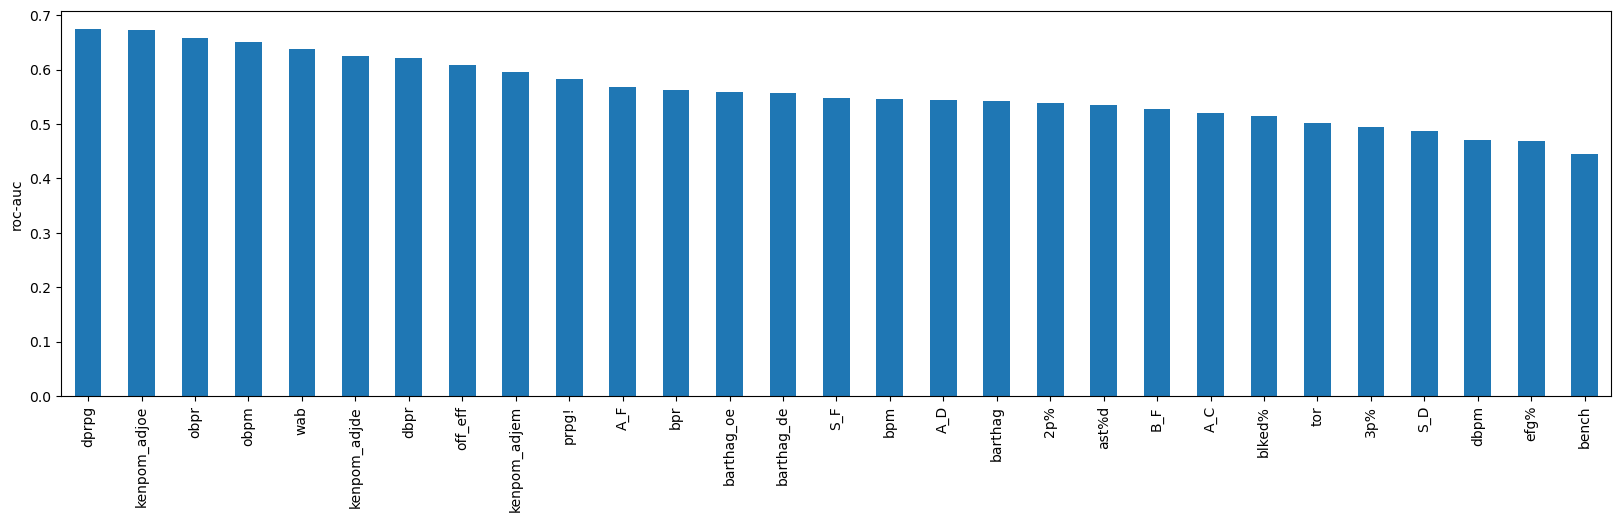

In [96]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [97]:
len(roc_values[roc_values > 0.5])

24

In [98]:
len(roc_values[roc_values > 0.6])

8

In [99]:
roc_values[roc_values > 0.6]

wab            0.6371
dprpg          0.6741
obpm           0.6515
obpr           0.6579
dbpr           0.6210
kenpom_adjoe   0.6727
kenpom_adjde   0.6243
off_eff        0.6082
dtype: float64

### IV. Exhaustive Feature Selection

In [100]:
X_train_scaled2 = X_train_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%d', 
    'bench'
]]

X_test_scaled2 = X_test_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%d', 
    'bench'
]]

### V. XG Boost

In [101]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Set up hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 300, 400, 500, 1000],
    'subsample': [0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
    'gamma': [0.2, 0.3, 0.4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Best Hyperparameters: {'colsample_bytree': 0.3, 'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.1}


In [102]:
# Retrain the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

best_xgb_model.fit(X_train_scaled2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [103]:
# Predict probabilities
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled2)[:, 1]

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on test set: {logloss}")

Log Loss on test set: 0.5484754547255672


In [104]:
# Predictions
y_train_pred = best_xgb_model.predict(X_train_scaled2)
y_test_pred = best_xgb_model.predict(X_test_scaled2)

# Calculate accuracy scores
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1 Score on Training Data: {f1_train:.2f}")
print(f"F1 Score on Test Data: {f1_test:.2f}")

F1 Score on Training Data: 0.90
F1 Score on Test Data: 0.82


<Figure size 1000x600 with 0 Axes>

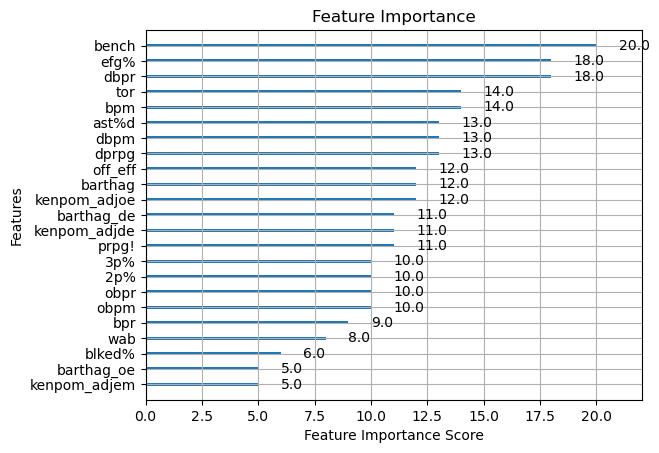

Feature importance (sorted):


NameError: name 'feature_names' is not defined

In [108]:
from xgboost import plot_importance

# Extract feature importance
feature_importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Visualize feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, importance_type='weight', show_values=True, xlabel='Feature Importance Score')
plt.title('Feature Importance')
plt.show()

# Print sorted feature importance
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance (sorted):")
for feature, importance in sorted_importance:
    print(f"{feature_names[int(feature[1:])]}: {importance}")